In [1]:
from LIMxCMBL.cross_spectrum import *
from LIMxCMBL.init import *
from LIMxCMBL.kernels import get_f_Kkappa, get_f_KI, get_f_KILo, apply_window

import sys
zmin = 3.5
zmax = 8.1
Lambda = 1e-3
chis_resample_len = int(np.log2(len(chis_resample)))
oup_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa/zmin_%.5f_zmax_%.5f_Lambda_%.5f_chi_sample_2e%d.npy'%(zmin, zmax, Lambda,chis_resample_len)
oup_ILo_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa/ILoKappa/zmin_%.5f_zmax_%.5f_Lambda_%.5f_chi_sample_2e%d.npy'%(zmin, zmax, Lambda,chis_resample_len)
print('outputting to', oup_fname)


chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

f_Kkappa = get_f_Kkappa()
a_of_chibs = ccl.scale_factor_of_chi(cosmo, chibs)
z_of_chibs = 1/a_of_chibs - 1


#<I Kappa>
f_KLIM   = get_f_KI()
f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)


outputting to /scratch/users/delon/LIMxCMBL/IHiKappa/zmin_3.50000_zmax_8.10000_Lambda_0.00100_chi_sample_2e13.npy


In [31]:
chis_resample[window][-1]

9173.227167408972

In [43]:
_chis   = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), 105)


_chis = np.linspace(chis_resample[window][0], chis_resample[window][-1], len(window))

In [44]:
f_inner_integral_delta = interp1d(x = deltas, y = inner_dkparp_integral, axis = -1)

In [45]:
def d_delta_integrand(log_delta, f_Kpsi, f_Kphi):
    delta = np.exp(log_delta)
    prefactor = 2 / _chis
    kernels = (f_Kpsi(_chis * (1 - delta)) * f_Kphi(_chis * (1 + delta)) 
               + f_Kpsi(_chis * (1 + delta)) * f_Kphi(_chis * (1 - delta))).reshape(1, -1)
    inner_integral_resampled = f_inner_integral_delta(delta)
    f_inner_integral_resampled = interp1d(x = chibs, y = inner_integral_resampled)
    inner_integral_resampled = f_inner_integral_resampled(_chis)
    return prefactor * kernels * inner_integral_resampled * delta

In [46]:
oup, _ = quad_vec(d_delta_integrand, np.log(1e-6), np.log(1-eps),
                  args=(f_KLIM_windowed, f_Kkappa),
                  epsabs = 0.0, epsrel = 1e-3)

KeyboardInterrupt: 

In [36]:
vb = np.max(np.abs(oup))

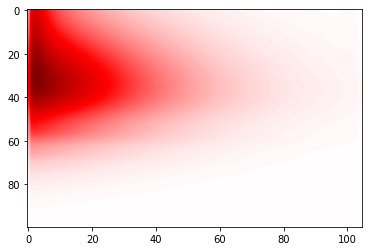

In [37]:
plt.imshow(oup, aspect='auto', vmin = -vb, vmax = vb, cmap= 'seismic')

In [38]:
window = np.where((chis_resample > np.min(_chis)) & (chis_resample < np.max(_chis)))[0]

In [39]:
Ik = d_delta_integral(f_KLIM_windowed, f_Kkappa)


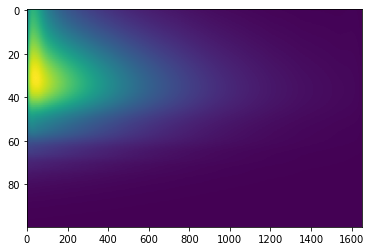

In [40]:
plt.imshow(Ik[:,window], aspect='auto')

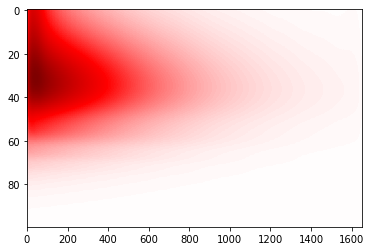

In [41]:
plt.imshow(Ik[:,window], aspect='auto', vmin = -vb, vmax = vb, cmap= 'seismic')